# Project: TMDb movie data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [48]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [51]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning: drop useless columns( 'imdb_id', 'homepage', 'tagline', 'keywords' ,'overview' )

In [101]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords' ,'overview'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


### Data Cleaning : remove missing values

In [102]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Note**: I found some missing values in ['genres', 'cast', 'director', 'production_companies'], and all the number is not big, so I gonna drop all of them. 

In [103]:
df.dropna(subset=['genres', 'cast', 'director', 'production_companies'],inplace = True)
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Data Cleaning : remove the data have 0 value in budget or revenue (because it doesn't make sense in real world)

In [104]:
df=df[df["budget"] != 0]
df=df[df["revenue"] != 0]

In [190]:
df[df["revenue"] == 0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Data Cleaning : drop duplicates

In [107]:
sum(df.duplicated())

1

In [108]:
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

> **Note:**  Since I dropped the missing values and duplicates, I need to reset the index

In [7]:
df.reset_index(inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What are the top 3 popular genres in the past 5 years ?

> **Step1**: Find out what are the years of films in the whole dataset, and what are the last five years in it.

In [109]:
df.sort_values(by='release_year', ascending=True)['release_year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [110]:
# confirm there is no missing year
range(1960,2016) == df.sort_values(by='release_year', ascending=True)['release_year'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

 **Note:** The dataset is from 1960 to 2015, and I only need 2010 to 2015.

> **Step2**: Clear the combined genres of the films in the whole dataset.

In [111]:
df['genres'].head(5)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

>  **Note:** It combines many genres in one columns, so I need to know the every genre covering in the full dataset because I want to divide it into different rows.

>  **Note:** I went to IMDB's genre website(https://www.imdb.com/feature/genre/), and I found they have genres in the below:

'Action',
'Adventure',
'Animation',
'Biography',
'Comedy',
'Crime',
'Documentary',
'Drama',
'Family',
'Fantasy',
'Film Noir',
'History	',
'Horror',
'Music',
'Musical',
'Mystery
'Romance',
'Sci-Fi',
'Short Film',
'Sport',
'Superhero',
'Thriller',
'War',
'Western',

> **Note:** There are movies combining several genres. I need to find what is the maximum numbers of genres of a film could have. So I can know how many variables need to be set.

In [112]:
max(df['genres'].apply(lambda x: len(x.split("|"))))

5

In [113]:
# split the orginal data with 5 different amounts of gernes

df_1genre = df[df['genres'].apply(lambda x: len(x.split("|")))==1]
df_2genre = df[df['genres'].apply(lambda x: len(x.split("|")))==2]
df_3genre = df[df['genres'].apply(lambda x: len(x.split("|")))==3]
df_4genre = df[df['genres'].apply(lambda x: len(x.split("|")))==4]
df_5genre = df[df['genres'].apply(lambda x: len(x.split("|")))==5]

In [114]:
# create copies of each genre set

df_21genre = df_2genre.copy()
df_22genre = df_2genre.copy()

df_31genre = df_3genre.copy()
df_32genre = df_3genre.copy()
df_33genre = df_3genre.copy()

df_41genre = df_4genre.copy()
df_42genre = df_4genre.copy()
df_43genre = df_4genre.copy()
df_44genre = df_4genre.copy()

df_51genre = df_5genre.copy()
df_52genre = df_5genre.copy()
df_53genre = df_5genre.copy()
df_54genre = df_5genre.copy()
df_55genre = df_5genre.copy()

In [115]:
# apply split function to each numbers of genre datasets of each dataframe copy

df_21genre["genres"] = df_2genre["genres"].apply(lambda x: x.split("|")[0])
df_22genre["genres"] = df_2genre["genres"].apply(lambda x: x.split("|")[1])

df_31genre["genres"] = df_3genre["genres"].apply(lambda x: x.split("|")[0])
df_32genre["genres"] = df_3genre["genres"].apply(lambda x: x.split("|")[1])
df_33genre["genres"] = df_3genre["genres"].apply(lambda x: x.split("|")[2])

df_41genre["genres"] = df_4genre["genres"].apply(lambda x: x.split("|")[0])
df_42genre["genres"] = df_4genre["genres"].apply(lambda x: x.split("|")[1])
df_43genre["genres"] = df_4genre["genres"].apply(lambda x: x.split("|")[2])
df_44genre["genres"] = df_4genre["genres"].apply(lambda x: x.split("|")[3])

df_51genre["genres"] = df_5genre["genres"].apply(lambda x: x.split("|")[0])
df_52genre["genres"] = df_5genre["genres"].apply(lambda x: x.split("|")[1])
df_53genre["genres"] = df_5genre["genres"].apply(lambda x: x.split("|")[2])
df_54genre["genres"] = df_5genre["genres"].apply(lambda x: x.split("|")[3])
df_55genre["genres"] = df_5genre["genres"].apply(lambda x: x.split("|")[4])

In [116]:
# append all of the diveded data into one dataframe
new_df = df_1genre.append([df_21genre,df_22genre,df_31genre,df_32genre,df_33genre,df_41genre,df_42genre,df_43genre,df_44genre,df_51genre,df_52genre,df_53genre,df_54genre,df_55genre])

In [117]:
# Make sure every genre had been divided.
new_df['genres'].unique()

array(['Action', 'Comedy', 'Drama', 'Horror', 'Thriller', 'Animation',
       'Science Fiction', 'Documentary', 'Fantasy', 'War', 'Adventure',
       'Music', 'Western', 'Romance', 'History', 'Mystery', 'Crime',
       'Family', 'Foreign', 'TV Movie'], dtype=object)

In [118]:
# reset index
new_df.reset_index(inplace = True)
new_df.drop('index', axis=1, inplace=True)

> **Step3:** find the top 3 popular gernes from 2010 to 2015 by "popularity" column

In [119]:
df_10_to_15 = new_df[new_df['release_year']>=2010]
df_10_to_15.groupby('genres')['popularity'].mean().sort_values(ascending=False)[0:3]

genres
Science Fiction    3.652345
Adventure          3.324471
Western            2.721777
Name: popularity, dtype: float64

In [157]:
# extract Top 3 genres from dataset
df_10_to_15_Sci = df_10_to_15[new_df['genres']=='Science Fiction']
df_10_to_15_Adv = df_10_to_15[new_df['genres']=='Adventure']
df_10_to_15_Wes = df_10_to_15[new_df['genres']=='Western']

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [161]:
# calculate the mean of popularity from 2010 to 2015 in order to plot later on.
mean_Sci = df_10_to_15_Sci.groupby('release_year')['popularity'].mean()
mean_Adv = df_10_to_15_Adv.groupby('release_year')['popularity'].mean()
mean_Wes = df_10_to_15_Wes.groupby('release_year')['popularity'].mean()

> **Last Step:** Visualization

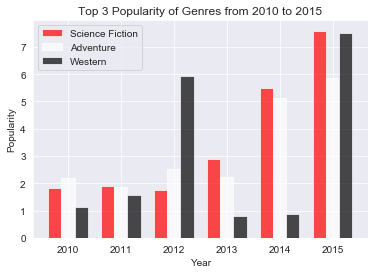

In [155]:
ind = np.arange(len(mean_Adv))
width = 0.25       # the width of the bars

# plot bars
red_bars = plt.bar(ind , mean_Sci, width, color='r', alpha=.7, label='Science Fiction')
white_bars = plt.bar(ind + width, mean_Adv, width, color='w', alpha=.7, label='Adventure')
Blue_bars = plt.bar(ind + 2*width, mean_Wes, width, color='k', alpha=.7, label='Western')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Year')
plt.title('Top 3 Popularity of Genres from 2010 to 2015')
locations = ind + width  # xtick locations
labels = range(2010,2016)  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [127]:
# drop useless columns
new_df.drop(['id','original_title'], axis=1, inplace=True)

> **Note:** Let's see all relations between every properties and revenue.

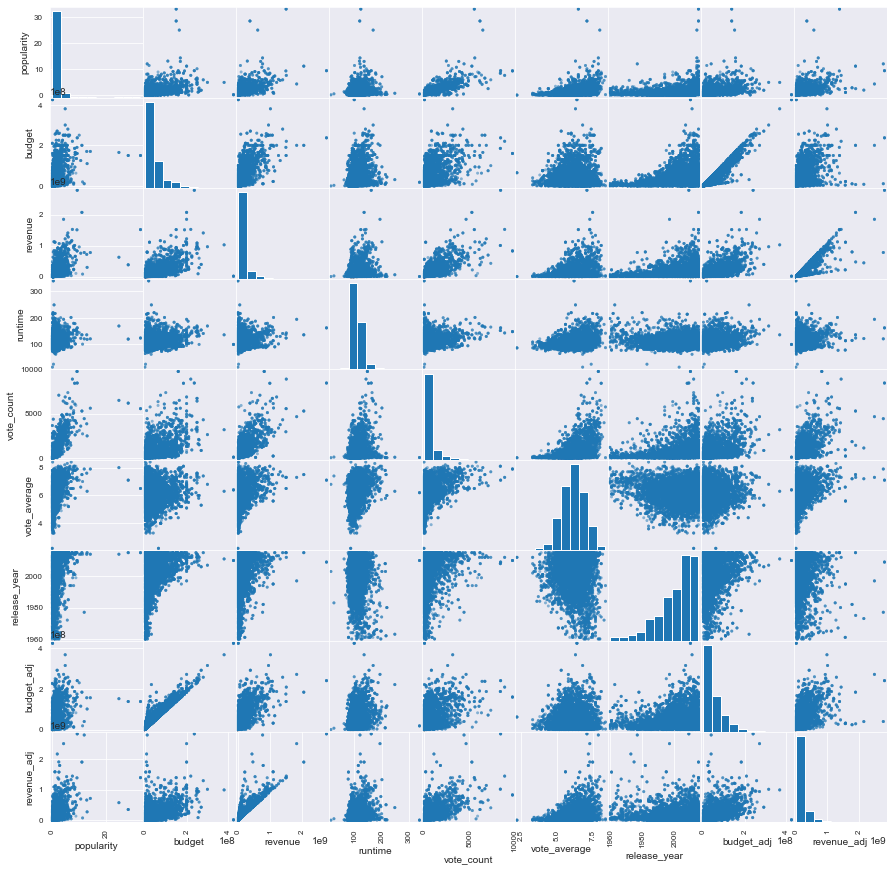

In [128]:
pd.plotting.scatter_matrix(new_df,figsize=(15, 15));


> **Note:** high revenues is in positive correlation with ["release_year", "vote_average", "vote_count", "budget", 'popularity']

> **Note:** However, due to the data type of 'genres', 'director', 'production_companies' and 'cast', so it doesn't show up on the plot. We have to measure them seperately.

> **First: Let's look at the 'genres' column**

In [129]:
#extract the revenue ranked by genres
rev_rank_by_genre = new_df.groupby("genres")['revenue'].describe().sort_values(by='mean',ascending=False)

In [130]:
rev_rank_by_genre['genre'] = dict(rev_rank_by_genre['mean']).keys()
rev_rank_by_genre.rename(columns = {"mean": "Average revenue"}, inplace=True)

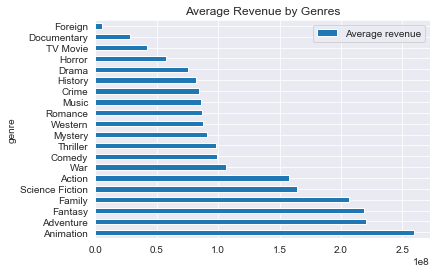

In [131]:
rev_rank_by_genre.plot(x='genre',y='Average revenue',kind='barh',title="Average Revenue by Genres");

> **Note:**  Genres are associated with movies that have high revenues. The top 1 genre, Animation, are 3 times bigger as forteenth place genre, Crime.

> **Second: Let's look at the 'director' column. Intuitively, we all understand that there definitely exists talented directors who have great ability at making money, so directors are definitely associated with movies that have high revenues. But I have more interest in knowing that whether the directors had filmed more movies are positively related to the high revenue per movie.**

In [132]:
# extract the director revenue dataframe ranked by numbers of films they filmed.
director_rev_df = new_df.groupby('director')['revenue'].describe().sort_values(by='count',ascending=False)
director_rev_df

,count,mean,std,min,25%,50%,75%,max
director,,,,,,,,
Steven Spielberg,73.0,3.378505e+08,2.243169e+08,12800000.0,1.775849e+08,321265768.0,4.706540e+08,9.201000e+08
Clint Eastwood,68.0,9.400510e+07,9.569565e+07,10600000.0,3.180000e+07,68673228.0,1.238965e+08,5.423074e+08
Ridley Scott,66.0,1.631100e+08,1.670181e+08,7191399.0,3.509253e+07,104931801.0,2.676401e+08,5.953803e+08
Robert Zemeckis,49.0,2.666305e+08,1.550547e+08,11715321.0,1.554644e+08,305875730.0,3.320000e+08,6.779454e+08
Tim Burton,48.0,2.460735e+08,2.478331e+08,5887457.0,7.944997e+07,179035751.0,3.622117e+08,1.025467e+09
...,...,...,...,...,...,...,...,...
Spencer Susser,1.0,3.829460e+05,NaN,382946.0,3.829460e+05,382946.0,3.829460e+05,3.829460e+05
Henry Bean,1.0,4.169250e+05,NaN,416925.0,4.169250e+05,416925.0,4.169250e+05,4.169250e+05
Harold Cronk,1.0,2.978900e+07,NaN,29789000.0,2.978900e+07,29789000.0,2.978900e+07,2.978900e+07


In [133]:
director_rev_df['count'].describe()

count    1683.000000
mean        6.048723
std         7.074010
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        73.000000
Name: count, dtype: float64

> **Note:** I wanna divide director_df into 4 different groups by min, 25%, 50%, 75% and max number of count in order to calculate the mean revenue of each groups.

In [134]:
# divide the data into four groups('Min','Medium' ,'Moderately High','Max') by numbers of films directors filmed.
bin_edges = [1 ,2 ,4 ,7 ,73] 
bin_names = ['Min','Medium' ,'Moderately High','Max' ]

director_rev_df['Count_levels'] = pd.cut(director_rev_df['count'], bin_edges, labels=bin_names)
director_rev_df.head()

,count,mean,std,min,25%,50%,75%,max,Count_levels
director,,,,,,,,,
Steven Spielberg,73.0,3.378505e+08,2.243169e+08,12800000.0,1.775849e+08,321265768.0,4.706540e+08,9.201000e+08,Max
Clint Eastwood,68.0,9.400510e+07,9.569565e+07,10600000.0,3.180000e+07,68673228.0,1.238965e+08,5.423074e+08,Max
Ridley Scott,66.0,1.631100e+08,1.670181e+08,7191399.0,3.509253e+07,104931801.0,2.676401e+08,5.953803e+08,Max
Robert Zemeckis,49.0,2.666305e+08,1.550547e+08,11715321.0,1.554644e+08,305875730.0,3.320000e+08,6.779454e+08,Max
Tim Burton,48.0,2.460735e+08,2.478331e+08,5887457.0,7.944997e+07,179035751.0,3.622117e+08,1.025467e+09,Max


In [135]:
# let's see the mean revenue by the four groups('Min','Medium' ,'Moderately High','Max').
director_rev_df.groupby('Count_levels').mean()['mean']

Count_levels
Min                5.499761e+07
Medium             7.436133e+07
Moderately High    1.017851e+08
Max                1.384553e+08
Name: mean, dtype: float64

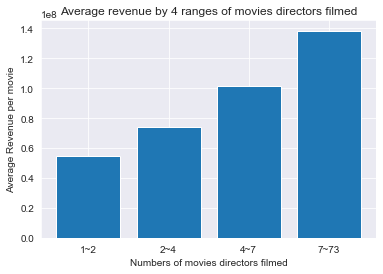

In [136]:
# visualization
locations = [1, 2 ,3 ,4]

labels = ['1~2', '2~4', '4~7', '7~73']

def plot_bar(x, y, labels, title ,xlabel, ylabel):
    plt.bar(x,y,tick_label = labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
plot_bar(locations, director_rev_df.groupby('Count_levels')['mean'].mean(), labels, 'Average revenue by 4 ranges of movies directors filmed', 'Numbers of movies directors filmed', 'Average Revenue per movie')

> **Note: Interesting! the directors had filmed more movies are related to the high revenue per movie.**

> **Third: Let's look at the 'production_companies' column**

In [137]:
new_df['production_companies']

0        Paramount Pictures|Skydance Productions|China ...
1        Universal Pictures|Media Rights Capital|Fuzzy ...
2                               Waverly Films|Warner Bros.
3        Double Feature Films|PeaPie Films|3 Arts Enter...
4        Pretty Pictures|Working Title Films|ArtÃ©mis P...
                               ...                        
10175    New Century Entertainment Corporation|Alliance...
10176               Twentieth Century Fox Film Corporation
10177    The Mirisch Production Company|Mirisch Films|S...
10178                Universal Pictures|Motown Productions
10179    Twentieth Century Fox Film Corporation|Solar P...
Name: production_companies, Length: 10180, dtype: object

> **Note:** I found that some films were produced by muti companies, and some were produced by single companies.

In [175]:
# Let's look at the films were produced by single companies first. Extract them and save them into 'Top10_rev_company'.
single_company = new_df[new_df['production_companies'].str.contains('|', regex=False)==False]
Top10_rev_company = single_company.groupby('production_companies')['revenue'].describe().sort_values(by='mean',ascending=False).head(10)

In [176]:
#put the names of the top10 companies into the 'Top10_rev_company'
Top10_rev_company['Company_names'] = dict(Top10_rev_company['mean']).keys()
Top10_rev_company.rename(columns = {"mean": "Average revenue per film"}, inplace=True)

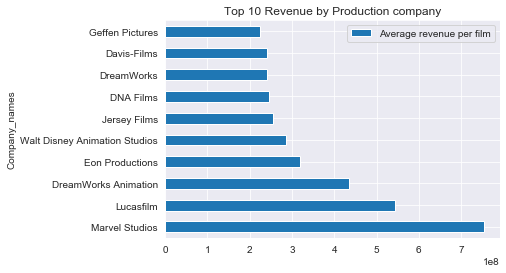

In [177]:
# Visualization
Top10_rev_company.plot(x='Company_names',y='Average revenue per film',kind='barh',title="Top 10 Revenue by Production company");

> **Note:** I found Marvel Studios had earned most revenue, and it's twice as much as Eon production.

In [178]:
# Let's look at the films were produced by muti companies. 
# And, let's investigate what's the difference in the revenue between muti-production company and single company.
muti_company = new_df[new_df['production_companies'].str.contains('|', regex=False)]
muti_company.groupby('production_companies')['revenue'].describe().sort_values(by='mean',ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
production_companies,,,,,,,,
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment,4.0,2.781506e+09,0.0,2.781506e+09,2.781506e+09,2.781506e+09,2.781506e+09,2.781506e+09
Lucasfilm|Truenorth Productions|Bad Robot,4.0,2.068178e+09,0.0,2.068178e+09,2.068178e+09,2.068178e+09,2.068178e+09,2.068178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment,3.0,1.845034e+09,0.0,1.845034e+09,1.845034e+09,1.845034e+09,1.845034e+09,1.845034e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,4.0,1.513529e+09,0.0,1.513529e+09,1.513529e+09,1.513529e+09,1.513529e+09,1.513529e+09
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,3.0,1.506249e+09,0.0,1.506249e+09,1.506249e+09,1.506249e+09,1.506249e+09,1.506249e+09


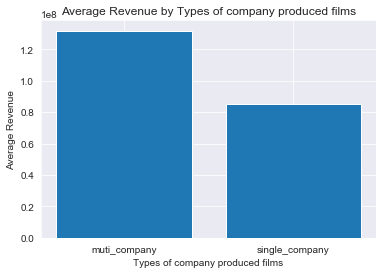

In [179]:
# Visualization
value1 = [muti_company['revenue'].mean(),single_company['revenue'].mean()]

plot_bar([1, 2], value1, ['muti_company', 'single_company'], 'Average Revenue by Types of company produced films', 'Types of company produced films', 'Average Revenue')

> **Note: I found that the films were produced by muti companies usually made more one third revenue than films made by single company.**

> **Final: Let's look at the 'cast' column**

In [180]:
df['cast']

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10822    Elizabeth Taylor|Richard Burton|George Segal|S...
10828    Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...
10829    John Wayne|Robert Mitchum|James Caan|Charlene ...
10835    Steve McQueen|Richard Attenborough|Richard Cre...
10848    Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...
Name: cast, Length: 3805, dtype: object

> **Note: Obviously, there are many casts in one films. Let's find out what is the maximum number of casts in a film in oreder to divide them into different rows, then that would be easier to investigate.**

In [181]:
max(df['cast'].apply(lambda x: len(x.split("|"))))

5

In [182]:
# split the orginal data with different amounts of casts

df_1cast = df[df['cast'].apply(lambda x: len(x.split("|")))==1]
df_2cast = df[df['cast'].apply(lambda x: len(x.split("|")))==2]
df_3cast = df[df['cast'].apply(lambda x: len(x.split("|")))==3]
df_4cast = df[df['cast'].apply(lambda x: len(x.split("|")))==4]
df_5cast = df[df['cast'].apply(lambda x: len(x.split("|")))==5]

In [183]:
# create copies of each cast set

df_21cast = df_2cast.copy()
df_22cast = df_2cast.copy()

df_31cast = df_3cast.copy()
df_32cast = df_3cast.copy()
df_33cast = df_3cast.copy()

df_41cast = df_4cast.copy()
df_42cast = df_4cast.copy()
df_43cast = df_4cast.copy()
df_44cast = df_4cast.copy()

df_51cast = df_5cast.copy()
df_52cast = df_5cast.copy()
df_53cast = df_5cast.copy()
df_54cast = df_5cast.copy()
df_55cast = df_5cast.copy()

In [184]:
# apply split function to each numbers of cast datasets of each dataframe copy

df_21cast["cast"] = df_2cast["cast"].apply(lambda x: x.split("|")[0])
df_22cast["cast"] = df_2cast["cast"].apply(lambda x: x.split("|")[1])

df_31cast["cast"] = df_3cast["cast"].apply(lambda x: x.split("|")[0])
df_32cast["cast"] = df_3cast["cast"].apply(lambda x: x.split("|")[1])
df_33cast["cast"] = df_3cast["cast"].apply(lambda x: x.split("|")[2])

df_41cast["cast"] = df_4cast["cast"].apply(lambda x: x.split("|")[0])
df_42cast["cast"] = df_4cast["cast"].apply(lambda x: x.split("|")[1])
df_43cast["cast"] = df_4cast["cast"].apply(lambda x: x.split("|")[2])
df_44cast["cast"] = df_4cast["cast"].apply(lambda x: x.split("|")[3])

df_51cast["cast"] = df_5cast["cast"].apply(lambda x: x.split("|")[0])
df_52cast["cast"] = df_5cast["cast"].apply(lambda x: x.split("|")[1])
df_53cast["cast"] = df_5cast["cast"].apply(lambda x: x.split("|")[2])
df_54cast["cast"] = df_5cast["cast"].apply(lambda x: x.split("|")[3])
df_55cast["cast"] = df_5cast["cast"].apply(lambda x: x.split("|")[4])

In [185]:
# append all of the diveded data into one dataframe
new_cast_df = df_1cast.append([df_21cast,df_22cast,df_31cast,df_32cast,df_33cast,df_41cast,df_42cast,df_43cast,df_44cast,df_51cast,df_52cast,df_53cast,df_54cast,df_55cast])

In [186]:
# Make sure every cast are divided.
new_cast_df['cast'].str.contains('|',regex=False).any() == False

True

> **Let's find out who are the top 10 casts by revenue.**

In [187]:
# extract top 10 cast ranked by revenue.
Top10_rev_cast = new_cast_df.groupby('cast')['revenue'].describe().sort_values(by='mean',ascending=False).head(10)

In [188]:
#put the names of the top10 casts into the 'Top10_rev_cast'
Top10_rev_cast['cast_names'] = dict(Top10_rev_cast['mean']).keys()
Top10_rev_cast.rename(columns = {"mean": "Average revenue per film"}, inplace=True)

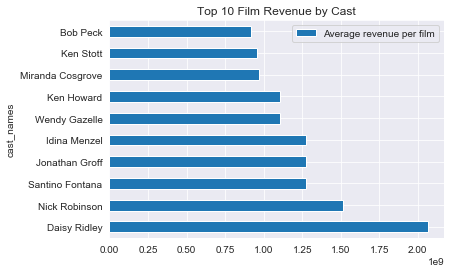

In [189]:
#Visualization
Top10_rev_cast.plot(x='cast_names',y='Average revenue per film',kind='barh',title="Top 10 Film Revenue by Cast");

<a id='conclusions'></a>
## Conclusions


**Limitation：**

**1. There are near 10% of missing values in "production_companies", so if there is any analysis based o the data of production_companies, then that would be some degree incorrect.**

**2. There are near 50% of 0 value in the "budget" and "revenue" columns, it might cause some analysis about budget or revenue have strong bias.**

### Conclusions For Question 1: What are the top 3 popular genres in the past 5 years ?

> **Top 1** is 'Science Fiction' got 3.652345 avaerage popularity per film. 

> **Top 2** is 'Adventure' got 3.324471 avaerage popularity per film. 

> **Top 3** is 'Western' got 2.721777 avaerage popularity per film.**


> **But, Popularity growth rate Ranking: 'Western' > 'Science Fiction' > "'Adventure'"**

> **Average YoY growth rate by popularity of 'Adventure' is 33.8%** (2010-2015)

> **Average YoY growth rate by popularity of 'Science Fiction' is 62.9%** (2010-2015)

> **Average YoY growth rate by popularity of 'Western' is 113.4%** (2010-2015)

### Conclusions For Question 2: What kinds of properties are associated with movies that have high revenues?

> high revenues is in positive correlation with **"release_year", "vote_average", "vote_count", "budget", 'popularity','genres', 'director', 'production_companies' and 'cast'**

About detailed relation between revenue and **genres**:

> **The top 1 genre, Animation, are 3 times bigger as forteenth place genre, Crime.**

About detailed relation between revenue and **directors**:

> the directors had filmed more movies are related to the high revenue per movie. **The average revenue of a film made by directors who had filmed at least 7 films is 3 times as much as directors who had filmed under 2 films**

About detailed relation between revenue and **production companies**:

> **Marvel Studios had earned most revenue, and it's twice as much as Eon production.**

> Top 10 ranking by revenue: **'Marvel Studios' > 'Lucasfilm' > 'DreamWorks Animation' > 'Eon Productions' > 'Walt Disney Animation Studios' > 'Jersey Films' > 'DNA Films' > 'DreamWorks' > 'Davis-Films' > 'Geffen Pictures'**

> Films were produced by muti companies usually made more one third revenue than films made by single company.**

About detailed relation between revenue and **casts**:

> **the revenue of cast, Daisy Ridley's movie is almost 2 times as much as the average of the rest casts' on the top 10 list.**